### This model has been built using Random Forest Model

**importing the dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**data collection**

In [2]:
wine_data = pd.read_csv('./winequality-red.csv')

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**checking missing values**

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**data analysis and visualization**

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


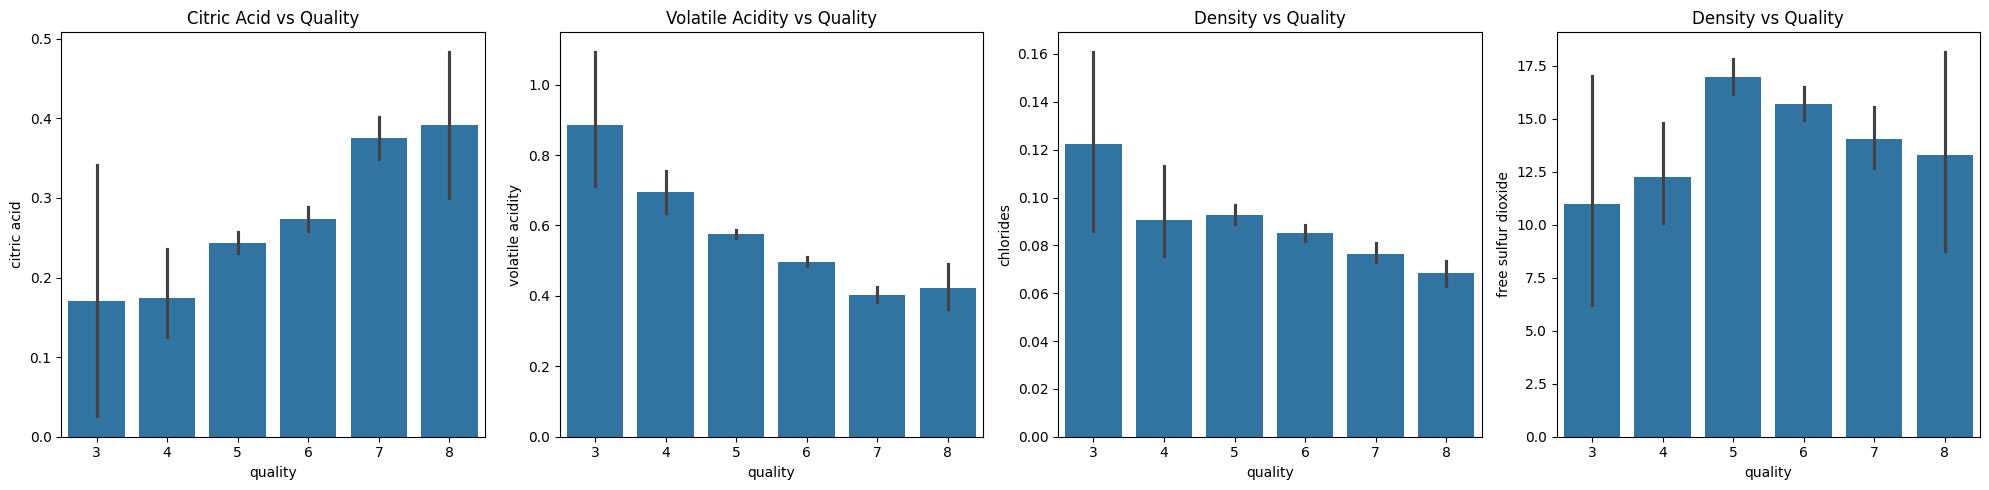

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 1 row and 2 columns

sns.barplot(ax=axes[0], x='quality', y='citric acid', data=wine_data)
axes[0].set_title('Citric Acid vs Quality')

sns.barplot(ax=axes[1], x='quality', y='volatile acidity', data=wine_data)
axes[1].set_title('Volatile Acidity vs Quality')

sns.barplot(ax=axes[2], x='quality', y='chlorides', data=wine_data)
axes[2].set_title('Density vs Quality')

sns.barplot(ax=axes[3], x='quality', y='free sulfur dioxide', data=wine_data)
axes[3].set_title('Density vs Quality')

plt.tight_layout()  
plt.show()

**correlation between columns**

In [36]:
correlation = wine_data.corr()

<Axes: >

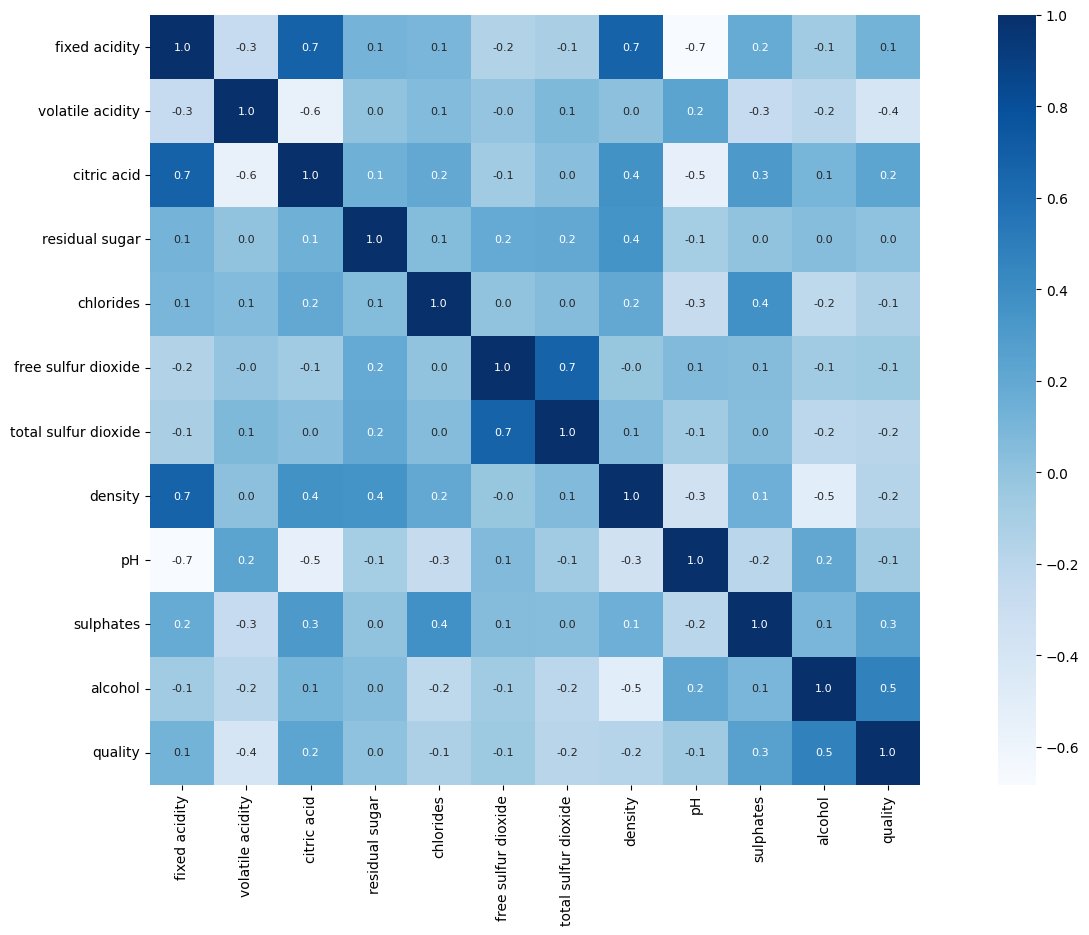

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**data preprocessing**

In [41]:
X = wine_data.drop('quality',axis=1)

**label binarization**

In [42]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

**splitting data into training and test data**

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.2, random_state=3)

**model training**

In [47]:
model = RandomForestClassifier()

In [48]:
model.fit(X_train,Y_train)

RandomForestClassifier()

**evaluation**

In [50]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(f"accuracy score of test data: {test_data_accuracy}")

accuracy score of test data: 0.8859375
